In [7]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# 展示高清图
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')

In [9]:
# Dataset

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.1307, 0.3081)
])

# Download datasets
train_Data = datasets.MNIST(
    root = 'D:/Jupyter/DNN/dataset/mnist',
    train = True,
    download = True,
    transform = transform
)


test_Data = datasets.MNIST(
    root = 'D:/Jupyter/DNN/dataset/mnist',
    train = False,
    download = True,
    transform = transform
)

In [10]:
# batch loader

train_loader = DataLoader(train_Data, shuffle=True, batch_size=64)
test_loader = DataLoader(test_Data, shuffle=False, batch_size=64)

In [15]:
# Build LeNet-5 CNN
# Input: 1x28x28 grey picture, 7 layers NN, output 10 nodes

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
    
        self.net = nn.Sequential( 
            # Build neural network
            nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.Tanh(), # C1: convolution layer
            nn.AvgPool2d(kernel_size=2, stride=2),                # S2: average pooling
            nn.Conv2d(6, 16, kernel_size=5), nn.Tanh(),           # C3: convolution layer
            nn.AvgPool2d(kernel_size=2, stride=2),                # S4: average pooling
            nn.Conv2d(16, 120, kernel_size=5), nn.Tanh(),         # C5: convolution layer
            nn.Flatten(),                                         # Flat to 1 dimension
            nn.Linear(120, 84), nn.Tanh(),                        # F5: fully connected layer
            nn.Linear(84, 10)                                     # F6: fully connected layer
        )
        
        # nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.Tanh()
        # 1: channel number, grey image with channel 1
        # 6: FN of kernel
        # kernel_size=5: kernel is 5 x 5
        # padding=2
        # stride = 1 no need to specify
        # use Tanh as activation function
        
    def forward(self, x):
        # forward propagation
        y = self.net(x) 
        return y       

In [16]:
# Examine Net Structure
X = torch.rand(size= (1, 1, 28, 28))
for layer in LeNet().net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape: \t', X.shape)

Conv2d output shape: 	 torch.Size([1, 6, 28, 28])
Tanh output shape: 	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape: 	 torch.Size([1, 6, 14, 14])
Conv2d output shape: 	 torch.Size([1, 16, 10, 10])
Tanh output shape: 	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape: 	 torch.Size([1, 16, 5, 5])
Conv2d output shape: 	 torch.Size([1, 120, 1, 1])
Tanh output shape: 	 torch.Size([1, 120, 1, 1])
Flatten output shape: 	 torch.Size([1, 120])
Linear output shape: 	 torch.Size([1, 84])
Tanh output shape: 	 torch.Size([1, 84])
Linear output shape: 	 torch.Size([1, 10])


In [17]:
model = LeNet().to('cuda:0')

In [18]:
loss_fn = nn.CrossEntropyLoss()

In [22]:
learning_rate = 0.9
optimizer = torch.optim.SGD(
    model.parameters(),
    lr = learning_rate
)

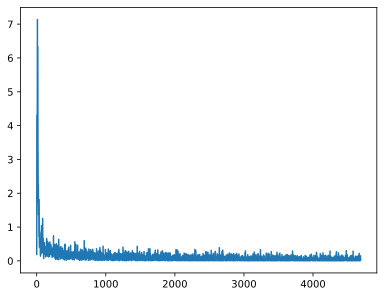

In [23]:
# Training Network
epochs = 5
losses = []    

for epoch in range(epochs):
    for(x,y) in train_loader:                
        x, y = x.to('cuda:0'), y.to('cuda:0') 
        Pred = model(x)
        loss = loss_fn(Pred, y)
        losses.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

Fig = plt.figure()
plt.plot(range(len(losses)), losses)
plt.show()

In [25]:
correct = 0
total = 0

with torch.no_grad():     
    for(x, y) in test_loader:  
        x, y = x.to('cuda:0'), y.to('cuda:0')
        Pred = model(x)       
        
        _, predicted = torch.max(Pred.data, dim = 1)
        correct += torch.sum( (predicted == y) )
        total += y.size(0)

print(f"Test Accuracy：{100*correct/total}%")

Test Accuracy：97.89999389648438%
